In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dtf = pd.read_csv('E:\Python Programs\Datasets\cod.csv')
dtf

,name,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths
0,RggRt45#4697369,0,0,0.000000,0,1,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0
1,JohniceRex#9176033,0,0,0.000000,0,1,0,110,0,7,0,7.0,0,0,0,700,0.0,0,16
2,bootybootykill#1892064,0,66,1.031250,0,9,0,110,0,32,16,32.0,0,1,0,48300,0.0,0,64
3,JNaCo#5244172,3,2,0.400000,0,1,0,0,0,3,0,3.0,0,0,0,1150,0.0,0,5
4,gomezyayo_007#6596687,0,2,0.200000,0,1,0,110,0,5,1,5.0,0,0,0,1000,0.0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,ImranePROPG#2085215,0,51,0.432203,0,10,0,110,0,71,11,71.0,0,0,0,49935,0.0,0,118
1554,Miguel_mor#1492856,0,0,0.000000,0,1,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0
1555,Trianthor#3462590,0,0,0.000000,0,1,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0
1556,tinytrex594#3976133,0,0,0.000000,0,1,0,0,2,1,0,1.0,0,1,7,0,91.2,9,0


In [3]:
dtf.drop(labels="name",inplace=True,axis=1)
dtf

,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths
0,0,0,0.000000,0,1,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0
1,0,0,0.000000,0,1,0,110,0,7,0,7.0,0,0,0,700,0.0,0,16
2,0,66,1.031250,0,9,0,110,0,32,16,32.0,0,1,0,48300,0.0,0,64
3,3,2,0.400000,0,1,0,0,0,3,0,3.0,0,0,0,1150,0.0,0,5
4,0,2,0.200000,0,1,0,110,0,5,1,5.0,0,0,0,1000,0.0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,0,51,0.432203,0,10,0,110,0,71,11,71.0,0,0,0,49935,0.0,0,118
1554,0,0,0.000000,0,1,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0
1555,0,0,0.000000,0,1,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0
1556,0,0,0.000000,0,1,0,0,2,1,0,1.0,0,1,7,0,91.2,9,0


In [4]:
dtf.fillna(value = dtf.mean(), inplace = True)

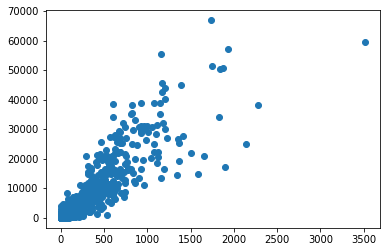

In [5]:
plt.scatter(dtf['wins'],dtf['kills'])

In [6]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(dtf)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sl = np.array(dtf['kills']).reshape(-1,1)
scl = MinMaxScaler()
scl.fit(sl)
sl_scaled = scl.transform(sl)
dtf['kills'] = sl_scaled.reshape(1,-1)[0]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sl = np.array(dtf['wins']).reshape(-1,1)
scl = MinMaxScaler()
scl.fit(sl)
sl_scaled = scl.transform(sl)
dtf['wins'] = sl_scaled.reshape(1,-1)[0]

In [ ]:
plt.scatter(dtf['wins'],dtf['kills'])

In [ ]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(dtf[['wins','kills']])
y_predicted

In [ ]:
dtf['cluster']=y_predicted

In [ ]:
df1 = dtf[dtf.cluster==0]
df2 = dtf[dtf.cluster==1]
df3 = dtf[dtf.cluster==2]
plt.ylim(0,1.1)
plt.xlim(0,1.1)
plt.scatter(df1.wins,df1['kills'],color='yellow',label='Cluster1(Bad Players)')
plt.scatter(df2.wins,df2['kills'],color='red',label='Cluster2(AVG Players)')
plt.scatter(df3.wins,df3['kills'],color='blue',label='Cluster3(Good Players)')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()
plt.xlabel('Wins')
plt.ylabel('Kills')